<a href="https://colab.research.google.com/github/croesusking/cse480-notebooks/blob/master/02_2_Language_Details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Details covering Ch2, Ch3

## Main Addition: Full definitions of various language builder functions presented here

Some of the material in this module could be repetitious, but still good practice.

A video describing the use of this module is below. Following that, we present the top-level functions defined in this module. Then come the function definitions themselves, and finally some tests that drive the functions and illustrate their usage.

**Note**: Some of the contents of the video below may not correspond to the latest code in these notebooks. However the principles remain the same.

**Note**: All functions have good internal documentation; so for example, if you run "help(lstar)", it will fully describe the lstar function.

**Note**: The definition of nthnumeric has evolved (it now expects a list as its second argument).

## This video is the same as in 02_01_Language_Basics -- less than 18 mins, so plz watch to recap!

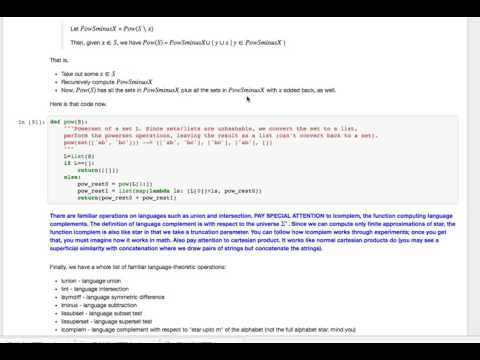

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('TAEYvJn5eGc')

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 25.35 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)



# Top-level functions in this module
 
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)


<span style="color:blue"> **Now we begin following along Chapter-2 of the book ** </span>

# Chapter-2: Alphabet and Languages

We begin our study of Alphabets and Languages. Please read the book. You *must* be doing two kinds of exercises:

* Do exercises on paper. That is the math you need from this course. There is no short-cut to it.

* Do the programming challenges (and play with the code) presented in this notebook (more exercises will be added). This programming part builds intuitions and helps knowledge stick. 

> Let us recall Prof. John McCarthy's quote

>> You do not understand anything unless you have studied it in multiple ways

It is to facilitate the "study in multiple ways" that the programming part is being given to you. It is the centerpiece of this work.

<span style="color:blue"> **Coding philosophy:** </span>

Clearly, the code in this book can be cast into an object-oriented style. We avoid doing so for these reasons:

* We want to keep the barrier to entry as low as possible. In fact, we are extremely parsimonious in our use of Python constructs. 

* We prefer to modularize each concept into specific sections where we treat the math and code as being almost at the same level. We also want these Jupyter notes to resemble Knuth's "literate programs". More reasons will be given in the Jupyter notes of Chapter 3.

<span style="color:blue"> **------** </span>

OK, now onto our subject matter!

## Alphabet and Language


An Alphabet is a *finite* set of finitary items, often called "symbols" - usually they are single characters, but they also could be finite strings or (in the case of GNFA) be themselves regular expressions.  Just think of an Alphabet $\Sigma$ to be a *finite* and *non-empty* set of symbols.

 
__Language__:


A language is a set of sequences (strings) of symbols. We define languages through Python code as follows. 

We are defining regular languages here. 

The simplest regular language is $\emptyset$, the empty language. This is like the "zero" of a language. Why so? We know that "0" is the annihilator for multiplication, i.e. 3 $\times$ 0 = 0. What is the multiplication operation for languages? It is concatenation!


* Notice that in almost all cases, languages are encoded using Python sets.

* Exceptions will be pointed out when they occur.

* Also, in almost all cases, languages are sets of strings.

__Zero Language__:

<span style="color:blue"> **We begin with the empty language (ZERO of a language). We use lphi() to refere to this language, as phi (Greek symbol) is used to denote the empty set. ** </span>

In [4]:
# The theory of languages : Primitive languages and language builders

def lphi():
    """In : None.
       Out: Zero language, i.e. set({}).
    """
    return set({})  # {} could be dict; so we put set(..)

In [5]:
lphi()

set()

__Unit Language__:

<span style="color:blue"> **Now we define the Unit language (ONE of a language) as well as concatenation. We use lunit() and lcat() to refer to these operations. ** </span>

Now let us define the Unit language ("1" for languages with respect to concatenation viewed as multiplication).

Let us also define language concatenation.

> $L1 \; L2 \;\; =\;\;  \{x y \; \mid \; x\in L1 \;\wedge\; y\in L2\}$

# Documentation Conventions

* Functions will have comment strings that start with """ and end with """
* In : will specify inputs separately, mentioning conceptual object and rep (Python data-type) 
* Out: will mention output, mentioning conceptual object and rep (Python data-type)
* Sometimes an example will follow
* Extremely simple helper functions won't have much of a doc (usually a one-liner)
* Example documentation:
```
  """In : L1 (language : a set),
          L2 (language : a set).
     Out: L1 concat L2 (language : a set).
     Example:
     L1 = {'ab', 'bc'} 
     L2 = {'11', 'ab', '22'} 
     lcat(L1,L2) -> {'abab', 'bc22', 'ab11', 'ab22', 'bcab', 'bc11'}
  """
```

In [6]:
def lunit():
    """In : None.
       Out: {""} (a language : a set).
    """
    return {""} # Set with epsilon

def lcat(L1,L2):
    """In : L1 (language : a set),
            L2 (language : a set).
       Out: L1 concat L2 (language : a set).
       Example:
       L1 = {'ab', 'bc'} 
       L2 = {'11', 'ab', '22'} 
       lcat(L1,L2) -> {'abab', 'bc22', 'ab11', 'ab22', 'bcab', 'bc11'}
    """
    return {x+y for x in L1 for y in L2}

In [7]:
""

''

In [8]:
L1 = {"a" * n for n in range(0,3)}
L1

{'', 'a', 'aa'}

In [9]:
L2 = {"b" * m for m in range(0,2)}
L2

{'', 'b'}

In [10]:
lcat(L1,L2)

{'', 'a', 'aa', 'aab', 'ab', 'b'}

In [11]:
lcat(lunit(), L1)

{'', 'a', 'aa'}

In [12]:
x = {'','a'}
xcrossx = { (a,b) for a in x for b in x}
xcrossx

{('', ''), ('', 'a'), ('a', ''), ('a', 'a')}

In [13]:
len(lcat(x,x)) == len(xcrossx)

False

__Language Concatenation vs. Cartesian Product__:

<span style="color:blue"> **Notice the similarity with cartesian product. We draw a string x from L1 and string y from L2, but instead of pairing them, we concatenate them.** </span>

## Illustrations 

We now illustrate 

* the Zero language lphi(), 

* unit language lunit(), 

* and the lcat() operator

Let us take a simple example language L = $\{{\text 'a'}, {\text 'bc'}\}$ for illustration.

Recall that in Python, there are multiple ways to quote strings ('a', "a", or """a"""). The main idea is to support the nesting of quotes. So please don't be confused if we accidentally change our quoting method.

In [80]:
L = {'a','bc'}

print( "lcat(lphi(), L) = ",  lcat(lphi(), L) )
 
print( "lcat(lunit(), L) = ",  lcat(lunit(), L)  )

lcat(lphi(), L) =  set()
lcat(lunit(), L) =  {'a', 'bc'}



Let us define another language through set comprehension, and exercise many different applications of concatenation.


* Consider the language

 > M = $\{ 0^m 1^n \; \mid \; 0 \leq m,n \leq 3 \;\wedge\; m < n \}$

In [81]:
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
print(M)

{'0111', '011', '11', '1', '111', '00111'}


In [82]:
print("lcat(L,M) = ", lcat(L,M))

lcat(L,M) =  {'bc0111', 'a011', 'a11', 'bc1', 'bc011', 'bc111', 'a1', 'a111', 'bc00111', 'a0111', 'bc11', 'a00111'}


In [83]:
print("lcat(M,lphi()) = ", lcat(M,lphi()))

lcat(M,lphi()) =  set()


In [84]:
print("lcat(M,lunit()) = ", lcat(M,lunit()))

lcat(M,lunit()) =  {'0111', '011', '11', '1', '111', '00111'}


<span style="color:green"> **Need to add a few exercises here. ** </span>

### Exponentiation as repeated concatenation

With concatenation and Unit under our belt, we can define exponentiation recursively. Exponentiation is repeated multiplication (which for us is concatenation).

> $L^n = L L^{n-1}$

> $L^0 = Unit$

We must have $L^0 = lunit()$; that is the only logical choice. 


__Question:__  If you defined $L^0 = lphi()$, then what happens?

The code below simulates the aforesaid recursion.

In [85]:
def lexp(L,n):
    """In : L (language : a set),
            n (exponent : a nat).
       Out: L^n (language : a set).
       Example:
       L = {'ab', 'bc'}
       n = 2
       lexp(A,2) -> {'abab', 'bcab', 'bcbc', 'abbc'}
    """
    return lunit() if n == 0 else lcat(L, lexp(L, n-1))


__Let us now test our lexp functionality__:



In [86]:
L = {'a','bc'}
lexp(L,2)

{'aa', 'abc', 'bca', 'bcbc'}

In [87]:
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
print('M = ', M)
print('lexp(M,2) = ')
lexp(M,2)

M =  {'0111', '011', '11', '1', '111', '00111'}
lexp(M,2) = 


{'0011100111',
 '00111011',
 '001110111',
 '001111',
 '0011111',
 '00111111',
 '01100111',
 '011011',
 '0110111',
 '0111',
 '011100111',
 '0111011',
 '01110111',
 '01111',
 '011111',
 '0111111',
 '100111',
 '1011',
 '10111',
 '11',
 '1100111',
 '11011',
 '110111',
 '111',
 '11100111',
 '111011',
 '1110111',
 '1111',
 '11111',
 '111111'}

In [88]:
L = {'a','bc'}
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
lexp(lcat(L,M),1)

{'a00111',
 'a011',
 'a0111',
 'a1',
 'a11',
 'a111',
 'bc00111',
 'bc011',
 'bc0111',
 'bc1',
 'bc11',
 'bc111'}

<span style="color:green"> **Need to add a few exercises here. ** </span>

<span style="color:blue"> **Definition of the star of a language through function lstar. Since star produces an infinite set in almost all cases, we define a _truncated_ version of star. ** </span>


### With lexp under our belt, we can define lstar. We will define "star up to n" and then set n to infinity.

> $L^{*n} = L^n \; \cup \; L^{*(n-1)}$

> $L^{*0} = Unit$

And thus the classical $L^* = L^{*n}\;\; {\rm for}\;\; n=\infty$, which we won't bother to "run" in Python :-).  We will only run $L^{*n}$ in Python.

We also take care to test that lstar works correctly for lphi and Unit.


In [89]:
def lunion(L1,L2):
    """In : L1 (language : a set),
            L2 (language : a set).
       Out: L1 union L2 (language : a set).
    """
    return L1 | L2

def lstar(L,n):
    """In : L (language : a set),
            n (bound for lstar : a nat). 
       Out: L*_n (language : a set)
    Example:
    L = {'ab','bc'}
    n = 2
    lstar(L,2) -> {'abab', 'bcbc', 'ab', 'abbc', '', 'bc', 'bcab'}
    """
    return lunit() if n == 0 else lunion(lexp(L,n), lstar(L,n-1))

In [90]:
L1 = {'a','bc'}
lstar(L1,2) 

{'', 'a', 'aa', 'abc', 'bc', 'bca', 'bcbc'}

In [91]:
L2 = {'ab','bc'}
lstar(L2,2) 

{'', 'ab', 'abab', 'abbc', 'bc', 'bcab', 'bcbc'}

In [92]:
L2 = {'ab','bc'}
lstar(L2,3)

{'',
 'ab',
 'abab',
 'ababab',
 'ababbc',
 'abbc',
 'abbcab',
 'abbcbc',
 'bc',
 'bcab',
 'bcabab',
 'bcabbc',
 'bcbc',
 'bcbcab',
 'bcbcbc'}

#### Let us define a typical alphabet used in our studies: $\Sigma = \{0,1\}$

In [93]:
Sig01 = {'0','1'}

In [94]:
lstar(Sig01,0)

{''}

In [95]:
lstar(Sig01,1)

{'', '0', '1'}

In [96]:
lstar(Sig01,2)

{'', '0', '00', '01', '1', '10', '11'}

In [97]:
lstar(Sig01,3)

{'',
 '0',
 '00',
 '000',
 '001',
 '01',
 '010',
 '011',
 '1',
 '10',
 '100',
 '101',
 '11',
 '110',
 '111'}

<span style="color:blue"> **Let's do a few exercises involving lstar. Use the pull-down provided by ipywidgets to select your language. Then use the slider to change the lstar truncation limit. If you had an infinite slider and slid it all the way to the right, you would be witnessing the "true star" :-) ** </span>

In [98]:
import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}
L3 = {'a','b','c'}
M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={'L3': L3, 'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'L3': {'b', 'c', 'a'}, 'L1': {'bc', 'a'}, 'L2': {'bc'…

<function __main__.lstar>

In [99]:
import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}
M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'L1': {'bc', 'a'}, 'L2': {'bc', 'ab'}, 'M': {'0111', …

<function __main__.lstar>

## Important use-case: Star of an alphabet

We generate the universe of strings possible over an alphabet by starring the alphabet (viewed as a language of strings of length 1). The illustration below shows that.

In [34]:
Alph1 = {'a','b'}
Alph2 = {'0','1'}
wdg.interact(lstar, L={'Alph1': Alph1, 'Alph2':Alph2}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'Alph1': {'b', 'a'}, 'Alph2': {'1', '0'}}, value={'b'…

<function __main__.lstar>

In [35]:
print(lstar(lunit(),10))
print(lstar(lstar(lunit(), 10), 10))

{''}
{''}



Now, we present a set of operations on strings and languages that are self-explanatory, so we'll just summarize them:

* srev - reverse a string
* lrev - reverse a language. It maps srev over a language (set of strings).
* shomo - apply a language homomorphism using a lambda passed in.  You can "rot13" code email using this :-)
* lhomo - apply a homomorphism to a language.

Since tests are embedded in the doc-strings of these functions, we will not show tests separately, but feel free to add tests.


In [36]:
# In Python, there isn't direct support for reversing a string.
# The backward selection method implemented by S[::-1] is what 
# many recommend. This leaves the start and stride empty, and
# specifies the direction to be going backwards. 
# Another method is "".join(reversed(s)) to reverse s

def srev(S):
    """In : S (string)
       Out: reverse of S (string)
       Example:
       srev('ab') -> 'ba'
    """
    return S[::-1] 

def lrev(L):
    """In : L (language : a set)
       Out: reverse of L (language : a set)
       Example: 
       lrev({'ab', 'bc'}) -> {'cb', 'ba'}
    """
    return set(map(lambda x: srev(x), L))

def shomo(S,f):
    """In : S (string)
            f (function from char to char)
       Out: String homomorphism of S wrt f.
       Example: 
       S = "abcd"
       f = lambda x: chr( (ord(x)+1) % 256 )
       shomo("abcd",f) -> 'bcde'  
    """
    return "".join(map(f,S))

def lhomo(L,f):
    """In : L (language : set of strings)
            f (function from char to char)
       Out: Lang. homomorphism of L wrt f (language : set of str)
       Example:
       L = {"Hello there", "a", "A"}
       f = rot13 = lambda x: chr( (ord(x)+13) % 256 )
       lhomo(L, rot13) -> {'N', 'Uryy|-\x81ur\x7fr', 'n'}
    """
    return set(map(lambda S: shomo(S,f), L))

<span style="color:blue"> **Let's do a few exercises involving srev, lrev, shomo and lhomo. ** </span>

In [37]:
L={'ab', '007'}

# modulo-rotate all chars by one.
rot1 = lambda x: chr( (ord(x)+1) % 256 ) 

# Don't be baffled if the sets print in a different order!               
# Sets don't have a required positional presentation order
# Watch for the CONTENTS of the set reversing !!
print('lrev(L) = ', lrev(L)) 

print('lhomo(L, rot1) = ', lhomo(L, rot1))

print('lrev(lhomo(L), rot1) = ', lrev(lhomo(L, rot1)))


lrev(L) =  {'ba', '700'}
lhomo(L, rot1) =  {'bc', '118'}
lrev(lhomo(L), rot1) =  {'811', 'cb'}


<span style="color:blue"> **We now introduce powersets which you may have forgotten. We will need this when discussing non-deterministic finite automata.** </span>



We now define the powerset of a set S. We work with lists, as sets cannot contain other sets (not hashable, etc). But barring all that, here is the recursive definition being used.

> Let $PowSminusX$ = $powset(S \setminus x)$

> Then, given $x \in S$, we have $powset(S)$ = $PowSminusX  \cup$  { $y\cup x$  $\mid$ $y\in PowSminusX$ } 

That is,

* Take out some $x\in S$

* Recursively compute $PowSminusX$

* Now, $powset(S)$ has all the sets in $PowSminusX$ plus all the sets in $PowSminusX$ with $x$ added back, as well.

Here is that code now.


In [38]:
def powset(S):
    """In : S (set)
       Out: List of lists representing powerset.
            Since sets/lists are unhashable, we convert the set 
            to a list,perform the powerset operations, leaving 
            the result as a list (can't convert back to a set).
       Example:
       S = {'ab', 'bc'}
       powset(S) -> [['ab', 'bc'], ['bc'], ['ab'], []]
    """
    L=list(S)
    if L==[]:
        return([[]])
    else:
        pow_rest0 = powset(L[1:])
        pow_rest1 = list(map(lambda Ls: [L[0]] + Ls, pow_rest0))
        return(pow_rest0 + pow_rest1)

In [39]:
powset({'a','b','c'})

[[], ['a'], ['c'], ['c', 'a'], ['b'], ['b', 'a'], ['b', 'c'], ['b', 'c', 'a']]

<span style="color:blue"> **There are familiar operations on languages such as union and intersection. 
PAY SPECIAL ATTENTION to lcomplem, the function computing language complements.
The definition of language complement is with respect to the universe  $\Sigma^*$. 
Since we can compute only finite approximations of star, the function lcomplem is also like star in that we take a truncation parameter. You can follow how lcomplem works through experiments; once you get that, you must imagine how it works in math.
Also pay attenti
on to cartesian product. It works like normal cartesian products do (you may see a superficial similarity with concatenation where we draw pairs of strings but concatenate the strings). ** </span>


Finally, we have a whole list of familiar language-theoretic operations:

* lunion - language union

* lint - language intersection

* lsymdiff - language symmetric difference

* lminus - language subtraction

* lissubset - language subset test

* lissuperset - language superset test

* lcomplem - language complement with respect to "star upto m" of the alphabet (not the full alphabet star, mind you)

* product - cartesian product

We do not provide too many tests for these rather familiar functions. But please make sure you understand language complements well!


In [40]:
# Define lunion (as before)
def lunion(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 union L2 (sets of strings)
    """
    return L1 | L2

def lint(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 intersection L2 (sets of strings)
    """
    return L1 & L2

def lsymdiff(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: (L1 \ L2) union (L2 \ L1) (sets of strings)
       Example:
       lsymdiff({'ab', 'bc'}, {'11', 'ab', '22'}) -> {'11', '22', 'bc'}
    """
    return L1 ^ L2

def lminus(L1,L2):
    """Language subtraction of two languages (sets of strings)
       Can do it as L1.difference(L2) also. 
    """
    return L1 - L2

def lissubset(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 is subset or equal to L2 (True/False)
    """
    return L1 <= L2

def lissuperset(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 is superset or equal to L2 (True/False)
    """
    return L1 >= L2
    
def lcomplem(L,sigma,n):
    """In : L (language : set of strings)
            sigma (alphabet : set of strings)
            n (finite limit for lstar : int)
       Out : sigma*_n - L (language : set of strings)
       Example:
       L = {'0', '10', '010'}
       sigma = {'0', '1'}
       n = 3
       lcomplem(L4,{'0','1'}, 3) -> 
       {'', '000', '101', '011', '00', '1', 
        '001', '110', '111', '100', '01', '11'}
    """
    return lstar(sigma,n) - L  

def product(S1,S2):
    """In : S1 (set)
            S2 (set)
       Out: Cartesian product of S1 and S2 (set of pairs)
    """
    return { (x,y) for x in S1 for y in S2 }

#--end

In [41]:
L1 = {'0101'}

In [42]:
L2 = lstar({'0','1'}, 2)

In [43]:
# Python variable L2L1 denotes concat of L2 and L1
L2L1 = lcat(L2,L1)  

In [44]:
L2L1

{'000101', '00101', '0101', '010101', '100101', '10101', '110101'}

In [45]:
L3 = lcat(L1, lunion(lunit(), L2L1))  

In [46]:
L3

{'0101',
 '0101000101',
 '010100101',
 '01010101',
 '0101010101',
 '0101100101',
 '010110101',
 '0101110101'}

In [47]:
# Note that I've provided a truncation limit of 10 for lstar
# involved in language complement.

L4 = {'0', '10', '010'}

print('L4 = ', L4)

print("----")
print("lcomplem(L4,{'0','1'}, 1) = ",  lcomplem(L4,{'0','1'}, 1) )  

print("----")
print("lcomplem(L4,{'0','1'}, 2) = ",  lcomplem(L4,{'0','1'}, 2) ) 

print("----")
print("lcomplem(L4,{'0','1'}, 3) = ",  lcomplem(L4,{'0','1'}, 3) ) 

print("----")
print("lcomplem(L4,{'0','1'}, 4) = ",  lcomplem(L4,{'0','1'}, 4) ) 

print("----")
print("In the limit, we get everything in {0,1}* ")
print(".. except for '0', '10', and '010'. ")

L4 =  {'10', '010', '0'}
----
lcomplem(L4,{'0','1'}, 1) =  {'', '1'}
----
lcomplem(L4,{'0','1'}, 2) =  {'', '01', '11', '00', '1'}
----
lcomplem(L4,{'0','1'}, 3) =  {'', '011', '101', '01', '11', '00', '1', '111', '100', '001', '000', '110'}
----
lcomplem(L4,{'0','1'}, 4) =  {'', '101', '01', '1010', '1100', '1101', '1111', '1', '100', '000', '0100', '0111', '011', '1000', '11', '00', '0011', '0010', '1110', '0101', '0000', '1001', '111', '001', '1011', '0001', '110', '0110'}
----
In the limit, we get everything in {0,1}* 
.. except for '0', '10', and '010'. 


<span style="color:blue"> **This finishes Chapter-2 of the book ** </span>

In [48]:
help(lsymdiff)

Help on function lsymdiff in module __main__:

lsymdiff(L1, L2)
    In : L1 (language : set of strings)
         L2 (language : set of strings)
    Out: (L1 \ L2) union (L2 \ L1) (sets of strings)
    Example:
    lsymdiff({'ab', 'bc'}, {'11', 'ab', '22'}) -> {'11', '22', 'bc'}



In [49]:
As = { "a"*i for i in range(8)}

In [50]:
As

{'', 'a', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa'}

In [51]:
Bs = { "b"*i for i in range(8)}

In [52]:
Bs

{'', 'b', 'bb', 'bbb', 'bbbb', 'bbbbb', 'bbbbbb', 'bbbbbbb'}

In [53]:
Cs = { "c"*i for i in range(8)}

In [54]:
Cs

{'', 'c', 'cc', 'ccc', 'cccc', 'ccccc', 'cccccc', 'ccccccc'}

In [55]:
ABs = { "a"*i + "b" * i for i in range (8)}

In [56]:
ABs

{'',
 'aaaaaaabbbbbbb',
 'aaaaaabbbbbb',
 'aaaaabbbbb',
 'aaaabbbb',
 'aaabbb',
 'aabb',
 'ab'}

In [57]:
BCs = { "b"*i + "c" * i for i in range (8)}

In [58]:
BCs

{'',
 'bbbbbbbccccccc',
 'bbbbbbcccccc',
 'bbbbbccccc',
 'bbbbcccc',
 'bbbccc',
 'bbcc',
 'bc'}

In [59]:
lcat(ABs, Cs)

{'',
 'aaaaaaabbbbbbb',
 'aaaaaaabbbbbbbc',
 'aaaaaaabbbbbbbcc',
 'aaaaaaabbbbbbbccc',
 'aaaaaaabbbbbbbcccc',
 'aaaaaaabbbbbbbccccc',
 'aaaaaaabbbbbbbcccccc',
 'aaaaaaabbbbbbbccccccc',
 'aaaaaabbbbbb',
 'aaaaaabbbbbbc',
 'aaaaaabbbbbbcc',
 'aaaaaabbbbbbccc',
 'aaaaaabbbbbbcccc',
 'aaaaaabbbbbbccccc',
 'aaaaaabbbbbbcccccc',
 'aaaaaabbbbbbccccccc',
 'aaaaabbbbb',
 'aaaaabbbbbc',
 'aaaaabbbbbcc',
 'aaaaabbbbbccc',
 'aaaaabbbbbcccc',
 'aaaaabbbbbccccc',
 'aaaaabbbbbcccccc',
 'aaaaabbbbbccccccc',
 'aaaabbbb',
 'aaaabbbbc',
 'aaaabbbbcc',
 'aaaabbbbccc',
 'aaaabbbbcccc',
 'aaaabbbbccccc',
 'aaaabbbbcccccc',
 'aaaabbbbccccccc',
 'aaabbb',
 'aaabbbc',
 'aaabbbcc',
 'aaabbbccc',
 'aaabbbcccc',
 'aaabbbccccc',
 'aaabbbcccccc',
 'aaabbbccccccc',
 'aabb',
 'aabbc',
 'aabbcc',
 'aabbccc',
 'aabbcccc',
 'aabbccccc',
 'aabbcccccc',
 'aabbccccccc',
 'ab',
 'abc',
 'abcc',
 'abccc',
 'abcccc',
 'abccccc',
 'abcccccc',
 'abccccccc',
 'c',
 'cc',
 'ccc',
 'cccc',
 'ccccc',
 'cccccc',
 'ccccccc'}

In [60]:
lcat(As, Bs)

{'',
 'a',
 'aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaab',
 'aaaaaaabb',
 'aaaaaaabbb',
 'aaaaaaabbbb',
 'aaaaaaabbbbb',
 'aaaaaaabbbbbb',
 'aaaaaaabbbbbbb',
 'aaaaaab',
 'aaaaaabb',
 'aaaaaabbb',
 'aaaaaabbbb',
 'aaaaaabbbbb',
 'aaaaaabbbbbb',
 'aaaaaabbbbbbb',
 'aaaaab',
 'aaaaabb',
 'aaaaabbb',
 'aaaaabbbb',
 'aaaaabbbbb',
 'aaaaabbbbbb',
 'aaaaabbbbbbb',
 'aaaab',
 'aaaabb',
 'aaaabbb',
 'aaaabbbb',
 'aaaabbbbb',
 'aaaabbbbbb',
 'aaaabbbbbbb',
 'aaab',
 'aaabb',
 'aaabbb',
 'aaabbbb',
 'aaabbbbb',
 'aaabbbbbb',
 'aaabbbbbbb',
 'aab',
 'aabb',
 'aabbb',
 'aabbbb',
 'aabbbbb',
 'aabbbbbb',
 'aabbbbbbb',
 'ab',
 'abb',
 'abbb',
 'abbbb',
 'abbbbb',
 'abbbbbb',
 'abbbbbbb',
 'b',
 'bb',
 'bbb',
 'bbbb',
 'bbbbb',
 'bbbbbb',
 'bbbbbbb'}

In [61]:
ABCs = {"a"*i + "b"*i + "c"*i for i in range(8)}

In [62]:
ABCs

{'',
 'aaaaaaabbbbbbbccccccc',
 'aaaaaabbbbbbcccccc',
 'aaaaabbbbbccccc',
 'aaaabbbbcccc',
 'aaabbbccc',
 'aabbcc',
 'abc'}

# Now, do the exercises at the end of Ch2 and Ch3

2.1.3

1. As per our definitions, can Nat be an alphabet? Why or why not?  
    -No, because alphabets need to be finite, and *Nat* is infinite. 
2. Consider the string "Hello there!". What are the symbols present  in this string, and what is the smallest alphabet underlying this string?
    - Symbols: "Hello there!"
    - Alphabet: {'H','e','l','o',' ','t','h','r','!'}
3. Are all palindromes the concatenation of a string with its reverse?  If not, why not?
    - No. Not all palindromes require doubling up on the center character. It is possible to have just a single character in the center.



2.1.4

1. Consider a string s = abacaca. Now consider the string exponentiation s 4. How many a’s are there in s 4? How about b’s, c’s and  d’s?  


In [72]:
#Question 1

S = {'abacaca'}
string = str(lexp(S,4))
Ays=[]
Bees=[]
Cees=[]
for x in string:
  if x == 'a':
    Ays.append(x)
  if x == 'b':
    Bees.append(x)
  if x == 'c':
    Cees.append(x)

print("a's = ", len(Ays))
print("b's = ", len(Bees))
print("c's = ", len(Cees))

a's =  16
b's =  4
c's =  8


2. Let Nat be regarded as the universal set in some domain of discourse. Now consider subsets of Nat, and let us view set intersection of such sets as “multiplication.” In that case, what is the  One element of this multiplication operator? What is the Zero element? Recall that for any s ⊆ Nat, these One and Zero elements  must satisfy:  
(a) s∩One = s  
    - The One element must be *Nat*
(b) s∩ Zero = Zero
    - The Zero element must be the empty set.

2.2

1. Why is ε not a member of La_l t_b?  
    - Since i < j, and j >= 0, the first element, has to be when j = 1, which gives us a single 'b'.
2. Which inequality in the definition of La_l t_b would you alter in  order to induce ε into this language? 
    - From < to <=


In [73]:
#2.2 python

#1

print("Question 1: ",['a'*i + 'b'*j + 'c'*k for i in range(3) for j in range(3) for k in range(3)])

#2

parens = {'('*i + ')'*i for i in range(6)}
print("Question 2: ", parens)

#3

#(p+q)[::-1] == (q[::-1] + p[::-1])
# This statement will be true for any two strings in python.
# By reversing the concatenation of the two strings, it will
# always return the second part reversed followed by the first
# part reversed.

# 4

# L1 produces what question 2 generates
# L2 doesn't have to have nested parenthesis,
#  for example, it could have "()()".
# L3 doesn't even need to balance out the opening
# paren with a closed one. For example, ")()("

# As a results, L1 is a subset of L2, and L2 is a subset of L3

Question 1:  ['', 'c', 'cc', 'b', 'bc', 'bcc', 'bb', 'bbc', 'bbcc', 'a', 'ac', 'acc', 'ab', 'abc', 'abcc', 'abb', 'abbc', 'abbcc', 'aa', 'aac', 'aacc', 'aab', 'aabc', 'aabcc', 'aabb', 'aabbc', 'aabbcc']
Question 2:  {'', '((((()))))', '()', '(())', '(((())))', '((()))'}


2.2.2

1. What is the difference between {ε} and {∅}? Which of these is a  language over the alphabet {2,3}?
    - {ε} is the language containing '', while {∅} is equal to set(). {ε} is the language over {2,3}. 
2. Prove that {ε} is indeed the One element for language concatenation by showing that it left-multiplies or right-multiplies any  language L to give back L.


In [74]:
#Question 1 and 2

print(lcat({'2','3'}, {''}))
print(lcat({'2','3'}, {}))

print(lcat({''}, {'2','3'}))
print(lcat({}, {'2','3'}))

{'2', '3'}
set()
{'2', '3'}
set()


1. Suppose Σ = {0,1}—commonly called “the alphabet” is treated as  a language. All alphabets are special cases of languages; there is  nothing surprising here! The alphabet Σ = {0,1} is a language of  two strings, each of length 1. Now, write out the contents of the  following language exponents in their entirety. To avoid confusion,  we have written out the answer for one case:  
(a) Σ 2 = {00,01,10,11}  
(b) Σ 0 =?  
(c) Σ 1 =?  
(d) Σ 3 =?  

2. Suppose a language M = {0,10} is given. What are the following  language exponents? We work out one case in detail for you.  
(a) M2 = {00,010,100,1010}. Here is the explanation:
  • M2 = MM
  • This means we must select two random strings from M  (repetitions allowed) and concatenate them.
  • The random selections can yield
    – 0 and 0, whose concatenation is 00;
    – 0 and 10, whose concatenation is 010;
    – 10 and 0, whose concatenation is 100;
    – 10 and 10, whose concatenation is 1010.
(b) M0 =?  
(c) M1 =?  
(d) M3 =?  

3. On Page 20, we defined three languages L1, L2, and L3. Answer  these questions with respect to these languages.  
(a) List the three shortest strings in L 3  1  .  
(b) List a string of length 6 in L2 that is not in L n 1 for any n.  
(c) What is the shortest string common to L 0 1, L 0 2, and L 0 3, and  why?



In [75]:
sigma = {'0','1'}

print(lexp(sigma, 2))
print(lexp(sigma, 0))
print(lexp(sigma, 1))
print(lexp(sigma, 3))

{'10', '01', '11', '00'}
{''}
{'1', '0'}
{'010', '011', '101', '111', '100', '001', '000', '110'}


In [76]:
alpha = {'0','10'}

print(lexp(alpha, 2))
print(lexp(alpha, 0))
print(lexp(alpha, 1))
print(lexp(alpha, 3))


{'010', '100', '00', '1010'}
{''}
{'10', '0'}
{'1000', '101010', '10100', '0010', '10010', '000', '01010', '0100'}


In [77]:
#Question 1

parens = ['('*i + ')'*i for i in range(3)]

for x in parens:
  print(x*3)

# Question 2

#()(()) or (())()

#Question 3

# If we multiply our results by 0, it doesn't matter what the alphabet is,
# the end result will always be the empty string. Therefore the shortest
# common string will be the empty string.


()()()
(())(())(())


2.2.6

1. On Page 20, we defined three languages L1, L2, and L3. Answer  these questions with respect to these languages.  
(a) Does L1 ∪ L2 match any of these three languages? Which  one, why?  
    - L1 ∪ L2 would result in L2 since L1 is a subset of L2.
(b) Repeat for L1 ∪ L3 and L1 ∩ L2. 
    - L1 is a subset for L2 and L2 is a subset for L3. Therefore, L1 ∪ L3 would result in L3 and L1 ∩ L2 would result in L1.

2. (This question can be answered with the hints given below, even  though we are introducing “star” officially only in the next chapter.) Let us define a function star with the following definition:  
(a) star(L,0) = L 0  
(b) star(L,1) = L 0 ∪ L 1  
(c) star(L,2) = L 0 ∪ L 1 ∪ L 2  

Now write down the contents of star(L,n) for various L and n.  Again, to avoid confusion, we have written out the answer for  some number of cases:  
(a) star({0,1},2) = {ε,0,1,00,01,10,11}  
(b) star({0,1},0) =?  
(c) star({0,1},1) =?  
(d) star({0,1},3) =?  
(e) star({0,10},2) = {ε,0,10,00,010,100,1010}  
(f) star({0,10},0) =?  
(g) star({0,10},1) =?  
(h) star({0,10},3) =? 
(i) star({0,1,00,ε},2) = {ε,0,1,00,01,000,10,11,100,001,0000}  
(j) How many elements are there in star({0,1},n)? Explain  your answer.  
(k) Suppose we define  
star({0,1}) = star({0,1},∞)  

That is, when we drop the second argument of the overloaded star function, we assume that its meaning is the  same as the star function of two arguments where the second argument is set to ∞.  Question: How would you describe one random string in  star({0,1})?  Think of a general way of characterizing it; here is a start:  An arbitrary string that is finite/infinite and each symbol  in the string is a....



In [78]:
#Question 2

print("a) ", lstar(sigma,2))
print("b) ", lstar(sigma,0))
print("c) ", lstar(sigma,1))
print("d) ", lstar(sigma,3))
print("e) ", lstar(alpha,2))
print("f) ", lstar(alpha,0))
print("g) ", lstar(alpha,1))
print("h) ", lstar(alpha,3))

#Question 2 j

#Formula = 2**(n+1)-1
newList=[2**(n+1)-1 ==len(lstar(sigma,n)) for n in range(20)]
print(all(newList))

#Question 2 k

#An arbitrary string that is finite/infinite and each symbol in the string is a 0 or 1

a)  {'', '00', '01', '11', '10', '1', '0'}
b)  {''}
c)  {'', '1', '0'}
d)  {'', '010', '011', '101', '01', '11', '00', '1', '0', '111', '100', '10', '001', '000', '110'}
e)  {'', '010', '100', '10', '1010', '00', '0'}
f)  {''}
g)  {'', '10', '0'}
h)  {'', '010', '1000', '1010', '101010', '10100', '00', '0010', '0', '100', '10010', '000', '10', '01010', '0100'}
True


In [79]:
#Questions 2.3

#1
Le={'0'*2*i for i in range(20)}
print(Le)

p = {x for x in Le if len(Le) % 2 == 0}
print(len(Le)==len(p))

#2
print(Le=={'00'*i for i in range(20)})

#3
Lo={'0'*(2*i+1) for i in range(20)}
print(lunion(Lo,Le)==lstar({'0'},39))


{'', '00000000000000000000', '000000000000000000000000000000000000', '00000000', '00', '0000000000000000000000', '000000000000000000000000', '0000', '000000', '0000000000', '00000000000000', '0000000000000000', '00000000000000000000000000', '0000000000000000000000000000', '000000000000000000000000000000', '000000000000', '0000000000000000000000000000000000', '000000000000000000', '00000000000000000000000000000000', '00000000000000000000000000000000000000'}
True
True
True


\#4

n 0s followed by n 1s. Equal amount of 0s and 1s, starting with all the 0s, followed by all the 1s

\#5

a = true, since it's the same definition with a different variable.

b = false, since n could be a different variable.

c = false, since 0 and 1 will always be present, omitting the empty string.

d = false, same as c, but also would be missing 01

e = true, it allows for all possibilities of 0s followed by 1s, and includes 
the empty string.

f = true, there will always be an equal amout of 0s followed by 1s.

\#6

Yes it is true.  When i is declared in seperate sets, it is no longer the same variable.  Therefore
the i for 0, does not need to equal the i for 1.

\#7

a) It is not true. This would produce a partial compliment, but would be leaving all the possibilites
of 1s followed by 0s.

b) "010", "110", "100", "101"

c) L6 = L8 U {{0,1}*i, 1{0,1}*j, 0{0,1}*k : i, j,k >= 0}

d) L8 is a partial compliment of L6, and is therefore a subset of the compliment of L6.

In [65]:
#3.2 Question 1

from random import sample

sample(list(lstar({'(',')'},5)),6)

[')()((', '()()(', ')))((', '', '))()(', ')()']

In [66]:
#3.2 Question 2

testingList=[]
for x in range(10):
  testing={'0'*i+'1'*j for i in range(x+1) for j in range(x+1)}
  testingList.append(testing==lcat(lstar({'0'},x),lstar({'1'},x)))

print(all(testingList))

True


3.2 Question 3

The Zero language which equals {}, and the Unit language which equals {""}

3.2 Question 4

a) The answer is LP2. Originally I thought LP1, but then I realized that only accomodates for even length palindromes. LP2 accounts not only for even, but odd length palindromes.

b) Since LP2 covers all the palindromes, LP2 is considered context-free.

In [67]:
#3.2 Question 5.a

newList=[]
for x in range(20):
  Le={'00'*i for i in range(x)}
  Lo={'0'*(2*i+1) for i in range(x)}
  if x > 0:
    newList.append(lunion(Lo,Le)==lstar({'0'},2*x-1))
 
print(all(newList))

True


3.2 Question 5.b

It is true of Le, but not Lo.  Any even number * 2 returns an even number, making it a valid case.  Any odd number * 2 returns an even number which would make this case false.

3.2 Question 5.c

The same principles apply to the previous question.  Any even number times any integer, results in an even number.

3.2 Question 5.d

No it is not. LoLo has to include a single '0' as its shortest element.  It does not contain the empty string like Le does.

i)If we start with every element, excluding the empty string, and we subtract every element AND the empty string, we are left with a set containing nothing, which is the Zero language.

ii) If we start with every element, AND the empty string, and we subtract every element, we are left with the set of the empty string, in other words, the Unit language.

3.2 Question 5.e

No. Le* contains only the even length elements, but {0}* contains even and odd length elements.

3.2 Question 5.f

No. Lo* contains all the even and odd length elements, and {0}* contains all the even and odd length elements.


3.2 Question 6

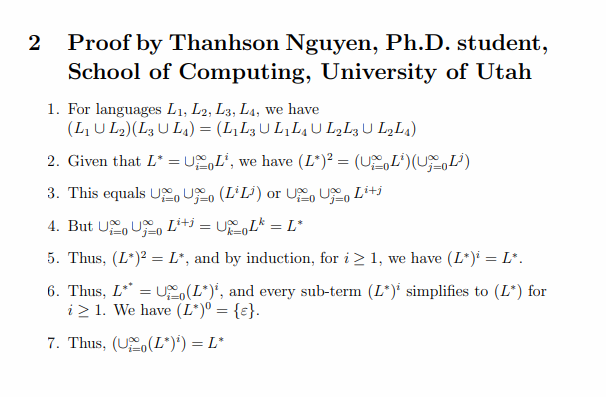


Obviously this is the answer provided.  What I got out of this was seeing the maneuvering of the expressions to manipulate them to show what we want.  The biggest take away for me was step 3.  It proves that LiLj = Li+j.  Since we converted multiplication style concatentation into addition style concatenation (while still being equivalent), we were able to show that i + j = k because i,j and k progress to infinity.


3.4.1 Question 1.a

Leqabc and intersection of (Las, Lbs, Lcs):  The only time they would intersect is when there are an equal amount of letters in the string AND the ordering is all the a's, followed by all the b's, followed by all the c's.



In [68]:
#3.4.1 Question 1.b 

Lx = {'a'*i+'b'*i+'c'*i for i in range(10)}
print(Lx)

{'', 'aaaaabbbbbccccc', 'aabbcc', 'aaaaaaaabbbbbbbbcccccccc', 'abc', 'aaaaaaabbbbbbbccccccc', 'aaaaaaaaabbbbbbbbbccccccccc', 'aaaaaabbbbbbcccccc', 'aaabbbccc', 'aaaabbbbcccc'}


3.4.1 Question 1.c

Leqabc and intersection of (Lcs, Las, Lcs, Lbs, Lcs):  The only time they would intersect is when there are an equal amount of letters in the string AND the ordering is c's, followed by a's, followed by c's, followed by b's, followed by c's.


3.5 Question 1

It is not homomorphic because when it is split into multiple pieces, it does not hold true.

In [69]:
#3.5 Question 2

def rot3(x):
  if ord(x)+3 > 122:
    x = chr(ord(x) - 26)
  return chr(ord(x)+3 % 256)


ourAlpha = {'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'}

lhomo(ourAlpha,rot3)

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

3.5 Question 2

With the code provided above, it is indeed a homomorphism.  However, mapping multiple letters to a single letter in the same function, cannot work. Therefore, only the first of the question is true.

In [70]:
#3.6 Question 1

def lexlt(s, t):
    if (s==""):
        return True
    if (t==""):
        return False
    if (s[0] < t[0]):
        return True
    return (s[0] == t[0]) & lexlt(s[1::], t[1::])


L1 = {"abacus", "bandana", "pig", "cat", "dodo", "zulu", "physics"}
L2 = {"dog", "zebra", "zzxyz", "pimento"}
L = set(product(L1,L2))
set(filter(lambda xy: lexlt(xy[0],xy[1]), L))

{('abacus', 'dog'),
 ('abacus', 'pimento'),
 ('abacus', 'zebra'),
 ('abacus', 'zzxyz'),
 ('bandana', 'dog'),
 ('bandana', 'pimento'),
 ('bandana', 'zebra'),
 ('bandana', 'zzxyz'),
 ('cat', 'dog'),
 ('cat', 'pimento'),
 ('cat', 'zebra'),
 ('cat', 'zzxyz'),
 ('dodo', 'dog'),
 ('dodo', 'pimento'),
 ('dodo', 'zebra'),
 ('dodo', 'zzxyz'),
 ('physics', 'pimento'),
 ('physics', 'zebra'),
 ('physics', 'zzxyz'),
 ('pig', 'pimento'),
 ('pig', 'zebra'),
 ('pig', 'zzxyz'),
 ('zulu', 'zzxyz')}

In [71]:
#3.6 Question 1
ourList=[]
for x in range(10):
  ourList.append(nthnumeric(x, ['0','1']))

print(ourList)

#Question 2
ourList.sort()
print(ourList)

['', '0', '1', '00', '01', '10', '11', '000', '001', '010']
['', '0', '00', '000', '001', '01', '010', '1', '10', '11']
